This project consit on implementer in 1D a monotone schema for the tansport problem:
    \begin{equation}
    \inf E(\rho, v) := \int^1_0 \int_{\mathbb{R}} \frac{1}{2} |v(t, x)|^2 \rho (t, x) dt dx + \int_{\mathbb{R}} V(x) \rho(1,x)dx
    \end{equation}
restricted to:
    \begin{array}{r l}
    \partial_t \rho - \varepsilon^2 \Delta \rho + \text{div} (\rho v) = 0 \text{ on } (0, 1) \times \mathbb{R}. & (1)
    \end{array}

# Discretisation
In this part we are going to code a algorithm for the resolution of (1).
1. First, we code an algorithm to solve the heat equation:
    \begin{array}{r l}
    \partial_t \rho - \varepsilon^2 \Delta \rho  = 0 \text{ on } (0, 1) \times \mathbb{R} & (2)
    \end{array}
    with the homogeneous Neumann conditions.
    
    To solve the heat equation numericaly we are going to use the Crank-Nicolson method, which consist in the convination of the forward Euler method with the backward Euler method in this way:
    \begin{equation}
    \frac{\rho^{n+1}_i - \rho^n_i}{\Delta t} = \frac{\varepsilon^2}{2 (\Delta x)^2} \left( \left( \rho^{n+1}_{i-1} -2\rho^{n+1}_i +\rho^{n+1}_{i+1} \right)
    + \left( \rho^{n}_{i-1} -2\rho^{n}_i +\rho^{n}_{i+1} \right) \right)
    \end{equation}
    where the superindex repersent the partition in time and the subindex the partition in space.
    
    
We denote $\alpha=\frac{\varepsilon^2\Delta t}{2 (\Delta x)^2}$. Combining the above equation with the boundary conditions $\left(\frac{\partial \rho(t,0)}{\partial x}=\frac{\partial \rho(t,1)}{\partial x}=0\right)$, we have:

\begin{align}
\rho_{1}^{n+1}-\rho_{0}^{n+1}&=0\\
-\alpha \rho_{i-1}^{n+1}+(1+2\alpha)\rho_{i}^{n+1}-\alpha \rho_{i+1}^{n+1}&=
\alpha \rho_{i-1}^{n}+(1-2\alpha)\rho_{i}^{n}+\alpha \rho_{i+1}^{n},\quad \forall\; 1\leq i \leq M-1,1\leq n \leq N\\
\rho_{M}^{n+1}-\rho_{M-1}^{n+1}&=0\\
\end{align}

Which we can put in matrix form:





\begin{equation}
\left(
\begin{array}{c}
1 & -1& 0&0&\cdots&\cdots&0\\
-\alpha & 1+2\alpha & -\alpha & 0&\cdots&\cdots &0\\
0 &-\alpha & 1+2\alpha & -\alpha & \cdots &\cdots&0\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
0 &\cdots&\cdots&\cdots&-\alpha & 1+2\alpha & -\alpha \\
0 &\cdots&0&0&0& 1& -1\\
\end{array}
\right)
\left(
\begin{array}{c}
\rho_{0}^{n+1}\\
\vdots\\
\rho_{i}^{n+1}\\
\rho_{i+1}^{n+1}\\
\vdots\\
\rho_{M}^{n+1}\\
\end{array}
\right)
=
\left(
\begin{array}{c}
0 & 0& 0&\cdots&\cdots&\cdots&0\\
\alpha & 1-2\alpha & \alpha & \cdots&\cdots&\cdots &0\\
0 & \alpha & 1-2\alpha & \alpha & \cdots &\cdots&0\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
0 &\cdots&\cdots&\cdots& \alpha & 1-2\alpha & \alpha \\
0 &\cdots&\cdots&\cdots&\cdots& 0& 0\\
\end{array}
\right)
\left(
\begin{array}{c}
\rho_{0}^{n}\\
\vdots\\
\rho_{i}^{n}\\
\rho_{i+1}^{n}\\
\vdots\\
\rho_{M}^{n}\\
\end{array}
\right)
\end{equation}

Which we write:
$$
(I-\alpha J)\rho^{n+1}=(I+\alpha J)\rho^{n};\;\;
\rho^{n+1}=(I-\alpha J)^{-1}(I+\alpha J)\rho^{n}
$$

We subsitute the first equation into the second and the last into the next-to-last:

\begin{equation}
\left(
\begin{array}{c}
 1+\alpha & -\alpha & \cdots&\cdots&\cdots &0\\
-\alpha & 1+2\alpha & -\alpha & \cdots &\cdots&0\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
0&\cdots&\cdots&-\alpha & 1+2\alpha & -\alpha\\
0 &\cdots&\cdots&0 & -\alpha & 1+\alpha \\
\end{array}
\right)
\left(
\begin{array}{c}
\rho_{1}^{n+1}\\
\vdots\\
\rho_{i}^{n+1}\\
\vdots\\
\rho_{M-1}^{n+1}\\
\end{array}
\right)
=
\left(
\begin{array}{c}
\alpha & 1-2\alpha & \alpha & \cdots&\cdots&\cdots &0\\
0 & \alpha & 1-2\alpha & \alpha & \cdots &\cdots&0\\
\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots\\
0 &\cdots&\cdots& \alpha & 1-2\alpha & \alpha&0 \\
0 &\cdots&\cdots&\cdots& \alpha & 1-2\alpha & \alpha \\
\end{array}
\right)
\left(
\begin{array}{c}
\rho_{0}^{n}\\
\vdots\\
\rho_{i}^{n}\\
\vdots\\
\rho_{M}^{n}\\
\end{array}
\right)
\end{equation}




Notice $I-\alpha J$ is invertible it's strictly diagonal dominant, which holds if $\vert\alpha\vert<1\iff \varepsilon^2\Delta t<2 (\Delta x)^2$

**Mass conservation**:
- Continous: The continous mass is: 
$m(t)=\int_\mathbb{R} \rho(t,x)dx$. Then
$$
m'(t)=\int_\mathbb{R} \partial_t\rho(t,x)dx
=\int_\mathbb{R} \partial_{xx}\rho(t,x)dx
=\partial_x\rho(t,\infty)-\partial_x\rho(t,-\infty)
=
0
$$

- Discrete: The discrete mass is:
$m^n=\Delta x\sum_{i=1}^{N-1}\rho^n_i$


In [83]:
#Init
%matplotlib notebook
from numpy import *
import numpy as np
from numpy.linalg import *
from scipy.sparse.linalg import *
from scipy.sparse import *



#Parameters' model


eps=0.01
M = 50
N =1000
L = 1
T = 1
dx=1/(M+1)
dt=1/(N+1)

x = np.linspace(0,1,M+1)
t = np.linspace(0,1,N)
dx = x[2]- x[1]
dt = t[1] -t[0]

def mass(x):
    return sum(x[1:-1])

def D(M,N):
    a = ones(M+1)
    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)


cfl = dx/(2*dt) - eps/dx
factg = 10
rho_ini = transpose([exp (-factg*(x-5)**2) ])
#rho_ini = rho_ini[1:M+1]
rho_ini = rho_ini / (dx * sum(rho_ini))
rho_ini=rho_ini.reshape(M+1)
#rho_ini=abs(np.random.rand(M+1))
#rho_ini=np.logspace(0,1,M+1)
#rho_ini=np.cos(np.linspace(-2*pi,2*pi,M+1))
rho_ini[0]=rho_ini[1]
rho_ini[-1]=rho_ini[-2]
V = transpose([exp (-factg*(x-2)**2) ]) + transpose([exp (-factg*(x-8)**2) ])
V = V[1:M+1]
V = 0.1 * (max(V)-V) / ( dx*sum(max(V)-V) )


alpha=eps**2*dt/2/dx**2
assert(abs(alpha)<1)

In [88]:
#Method implementation
###Explicit
##
##def lhs_explicit(M,N,alpha):
##    A = np.eye(M+1)
##    A[0,0]=1
##    A[0,1]=-1
##    A[-1,-1]=1
##    A[-1,-2]=-1
##
##    return A
##
##
##def rhs_explicit(M,N,alpha):
##    a = ones(M+1)
##    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
##    Id = eye(M+1)
##    
##    B = Id +alpha*D
##    B[0,0]=0
##    B[0,1]=0
##    B[-1,-1]=0
##    B[-1,-2]=0
##    
##    return B
##
###Implicit
##def lhs_implicit(M,N,alpha):
##    a = ones(M+1)
##
##    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
##    
##    Id = eye(M+1)
##    
##    A = Id -alpha*D
##    A[0,0]=1
##    A[0,1]=-1
##    A[-1,-1]=1
##    A[-1,-2]=-1
##    return A
##
##def rhs_implicit(M,N,alpha):
##    a = ones(M+1)
##    a[0]=0
##    a[-1]=0
##
##    return spdiags(a,(0,),M+1,M+1)

#Crank-Nicolson= lhs_implicit=1/2(rhs_implicit+rhs_explicit)


def lhs_simple(M,N,alpha):
    a = ones(M+1)

    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    
    Id = eye(M+1)
    
    A = Id -alpha*D
    #Order one boundary conditions
    A[0,0]=1
    A[0,1]=-1
    A[-1,-1]=1
    A[-1,-2]=-1
    
    ###Order two:
    #A[0,0]=3
    #A[0,1]=-4
    #A[0,2]=1
    #A[-1,-3]=-1
    #A[-1,-2]=4
    #A[-1,-1]=-3
    
    return A

def rhs_simple(M,N,alpha):
    a = ones(M+1)

    D = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    
    Id = eye(M+1)
    
    A = Id +alpha*D
    ##Order one boundary conditions
    #A[0,0]=0
    #A[0,1]=0
    #A[-1,-1]=0
    #A[-1,-2]=0
    
    ##Order two:
    A[0,0]=3
    A[0,1]=-4
    A[0,2]=1
    A[-1,-3]=-1
    A[-1,-2]=4
    A[-1,-1]=-3
    
    return A


def half_v(i,n):
    #Option 1
    #return v[i,n]
    
    #Option 2
    return 1/2*(v[i-1,n]+v[i,n])


def rhs_godunov(M,N,U0,v,n):
    def index(j):
        if v[j,n]<0:
            return j+1
        else:
            return j
    G = zeros(M+1)
    for i in range(1,M):
        G[i]= U0[index(i)]*half_v(i,n)-U0[index(i)]

    return G


<IPython.core.display.Javascript object>


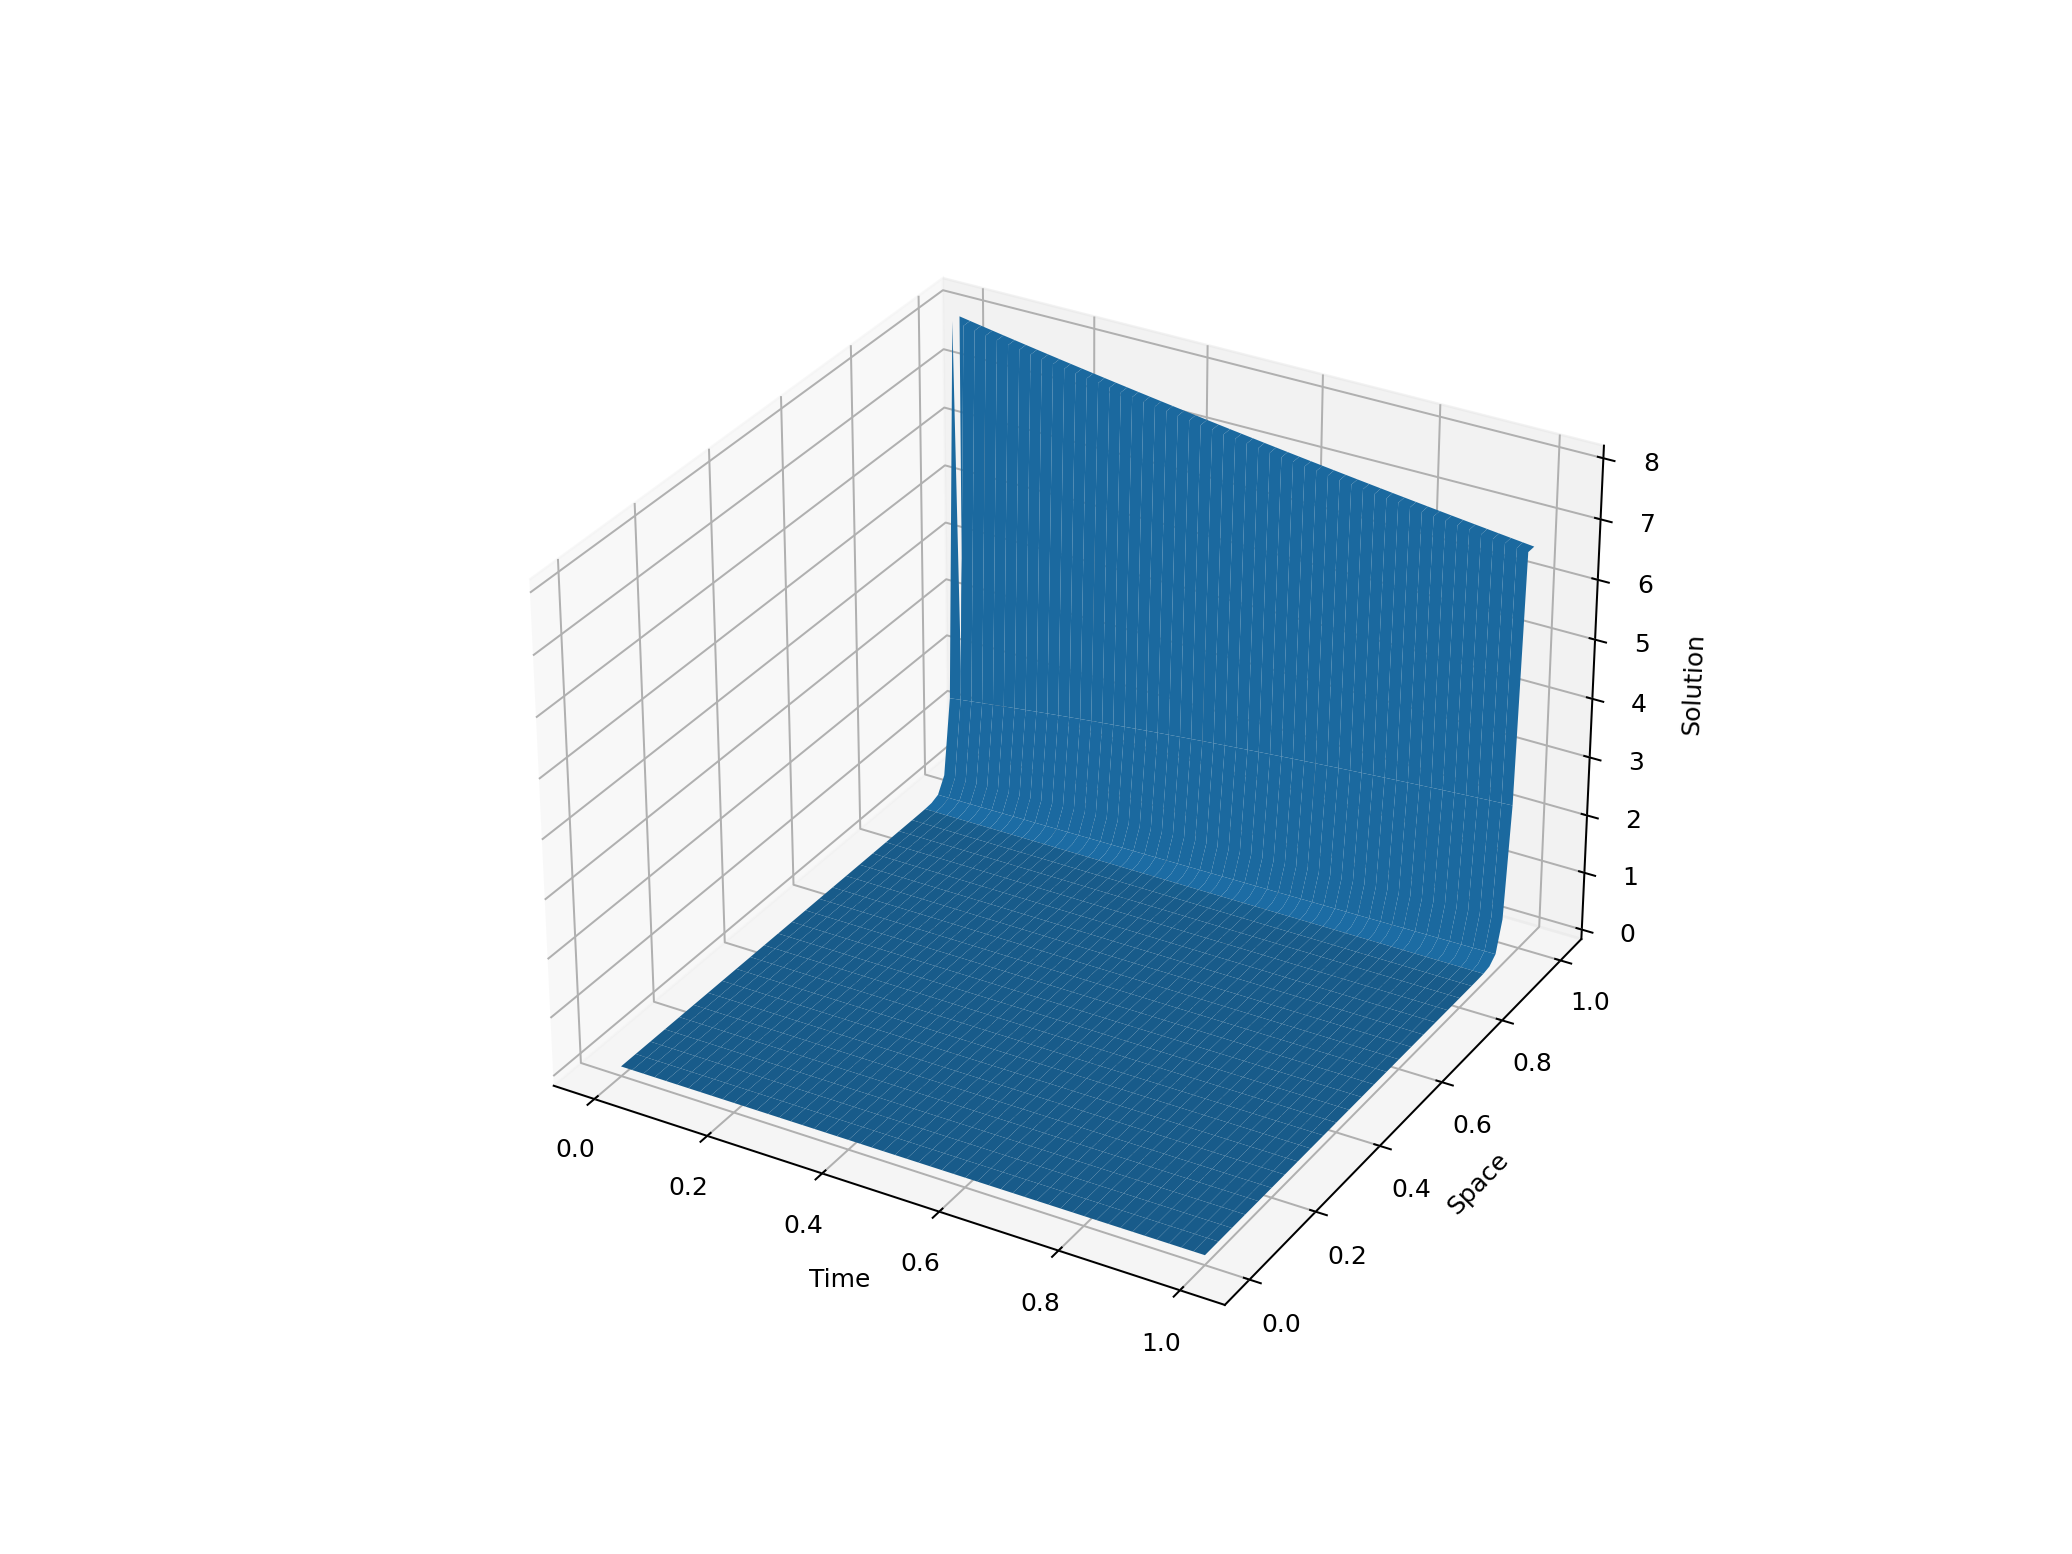

Text(0.5, 0, 'Solution')

In [90]:
from scipy.sparse.linalg import inv

def Crank_Nicolson(M, N, eps, U0):
    dx=1/(M+1)
    dt=1/(N+1)
    alpha=eps**2*dt/2/dx**2
    assert(abs(alpha)<1)
    
    A = lhs_simple(M,N,alpha)
    B = rhs_simple(M,N,alpha)
    U = zeros([M+1, N])
    U[:,0] = U0
    #C = inv(A)@B
    for n in range(N-1):
        U[:,n+1] = spsolve(A, B@U[:,n])

    return U



#Plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 




sol=Crank_Nicolson(M, N, eps, rho_ini)
 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


X,Y=meshgrid(t,x)

ax.plot_surface(X,Y,sol.reshape(X.shape))

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Solution')

In [47]:
alpha

0.00012512512512512512

2. Now we are going to code an algorithm to solve (2). We are going to add to the previous algorithm a Godunov's schema to discretise the term div$(\rho v)$:
\begin{equation}
\text{div}(\rho v) \approx \frac{\Delta t}{\Delta x} \left( \rho^n_{i+1/2} v^n_{i+1/2} - \rho^n_{i-1/2} v^n_{i-1/2} \right),
\end{equation}
where $i$ is the space's index and $n$ is the time's index and we define:
\begin{equation}
\rho^i_{i+1/2} = \left\{
\begin{array}{rcl}
\rho^n_{i+1} & \text{if} & v^n_{i+1/2} <0 \\
\rho^n_i & \text{if} & v^n_{i+1/2} \ge 0.
\end{array}
\right.
\end{equation}
We are going to verify also if $\rho$ is possitive for each pass of temps over the condition:
\begin{equation}
|v^n_{i+1/2}| \leq \lambda : = \frac{\Delta x}{2 \Delta x} - \varepsilon^2 \frac{1}{\Delta x}, ~~ \forall i = 1, \ldots, M-1.
\end{equation}

For verify this condition theoreticaly: (NO ENTIENDO QUE TIENE QUE VER UNA COSA CON LA OTRA)

<IPython.core.display.Javascript object>


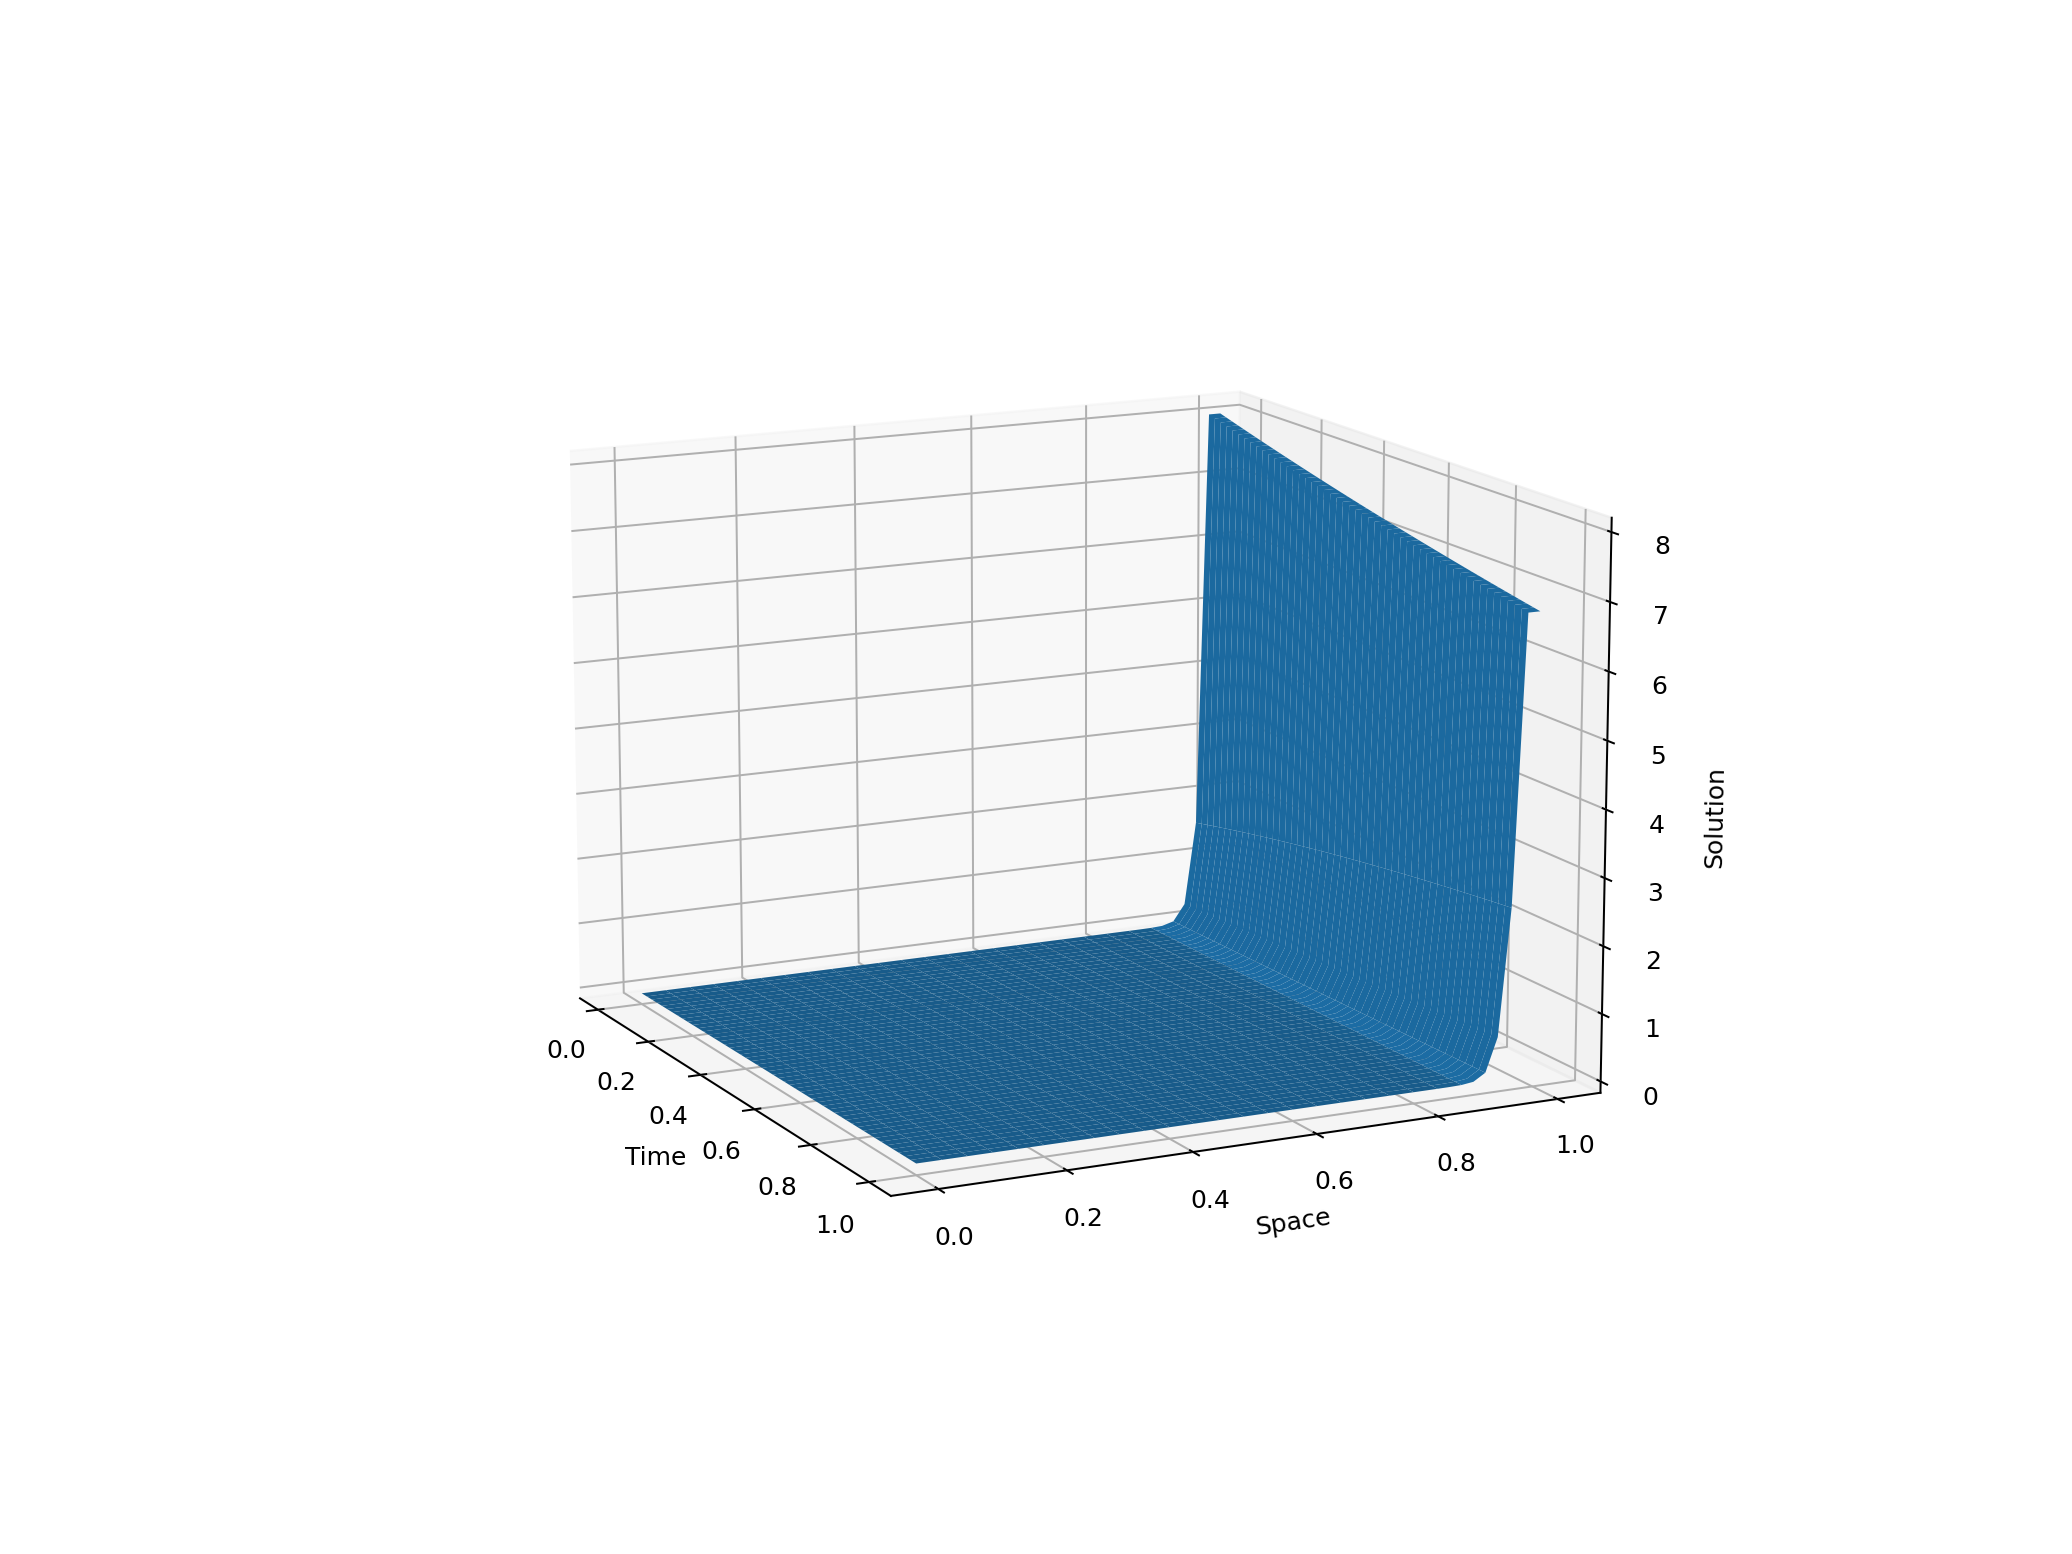

Text(0.5, 0, 'Solution')

In [86]:
def rho_half (rho, v):
    # rho, v : column vectors of dim M
    rho_half = zeros([M,1])
    for i in range (M):
        if v[i] < 0:
            rho_half[i] = rho[i+1]
        else:
            rho_half[i] = rho[i]
    return rho_half


def Godunov(M, N, dx, dt, eps, U0, v, l):
    beta = dt**2/dx
    
    G = zeros(M+1)
    
    A = lhs_simple(M,N,alpha)
    B = rhs_simple(M,N,alpha)
    U = zeros([M+1, N])
    U[:,0] = U0
    
    if any(abs(v) >l):
        print(f"lambda: {l}",sum(abs(v)))
        raise Exception('v > lambda')
    for n in range(N-1):
     
        U[:,n+1] = spsolve(A, B@U[:,n] - beta*rhs_godunov(M,N,U[:,n],v,n))

        
    return U


#Plotty Plot

#v=rand(M+1,N,density=0.3)
#v= 4*np.random.rand(M+1,N)
v =0.8*np.ones([M+1,N])

l = dx/(2*dt) - eps**2 /dx

sol=Godunov(M, N, dx, dt, eps, rho_ini,v,l)


#A = lhs_implicit(M,N,alpha)
#B = rhs_implicit(M,N,alpha)
#U = zeros([M+1, N])
#U[:,0] = rho_ini
#
#if any(abs(v) >l):
#    print(f"lambda: {l}",sum(abs(v)))
#    raise Exception('v > lambda')
#for n in range(N-1):
# 
#    U[:,n+1] = spsolve(A, B@U[:,n] - beta*rhs_godunov(M,N,U[:,n],v,n))
#    
#sol = U


 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

X,Y=meshgrid(t,x)

ax.plot_surface(X,Y,sol.reshape(X.shape))

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Solution')

In [19]:
l

0.985

<IPython.core.display.Javascript object>


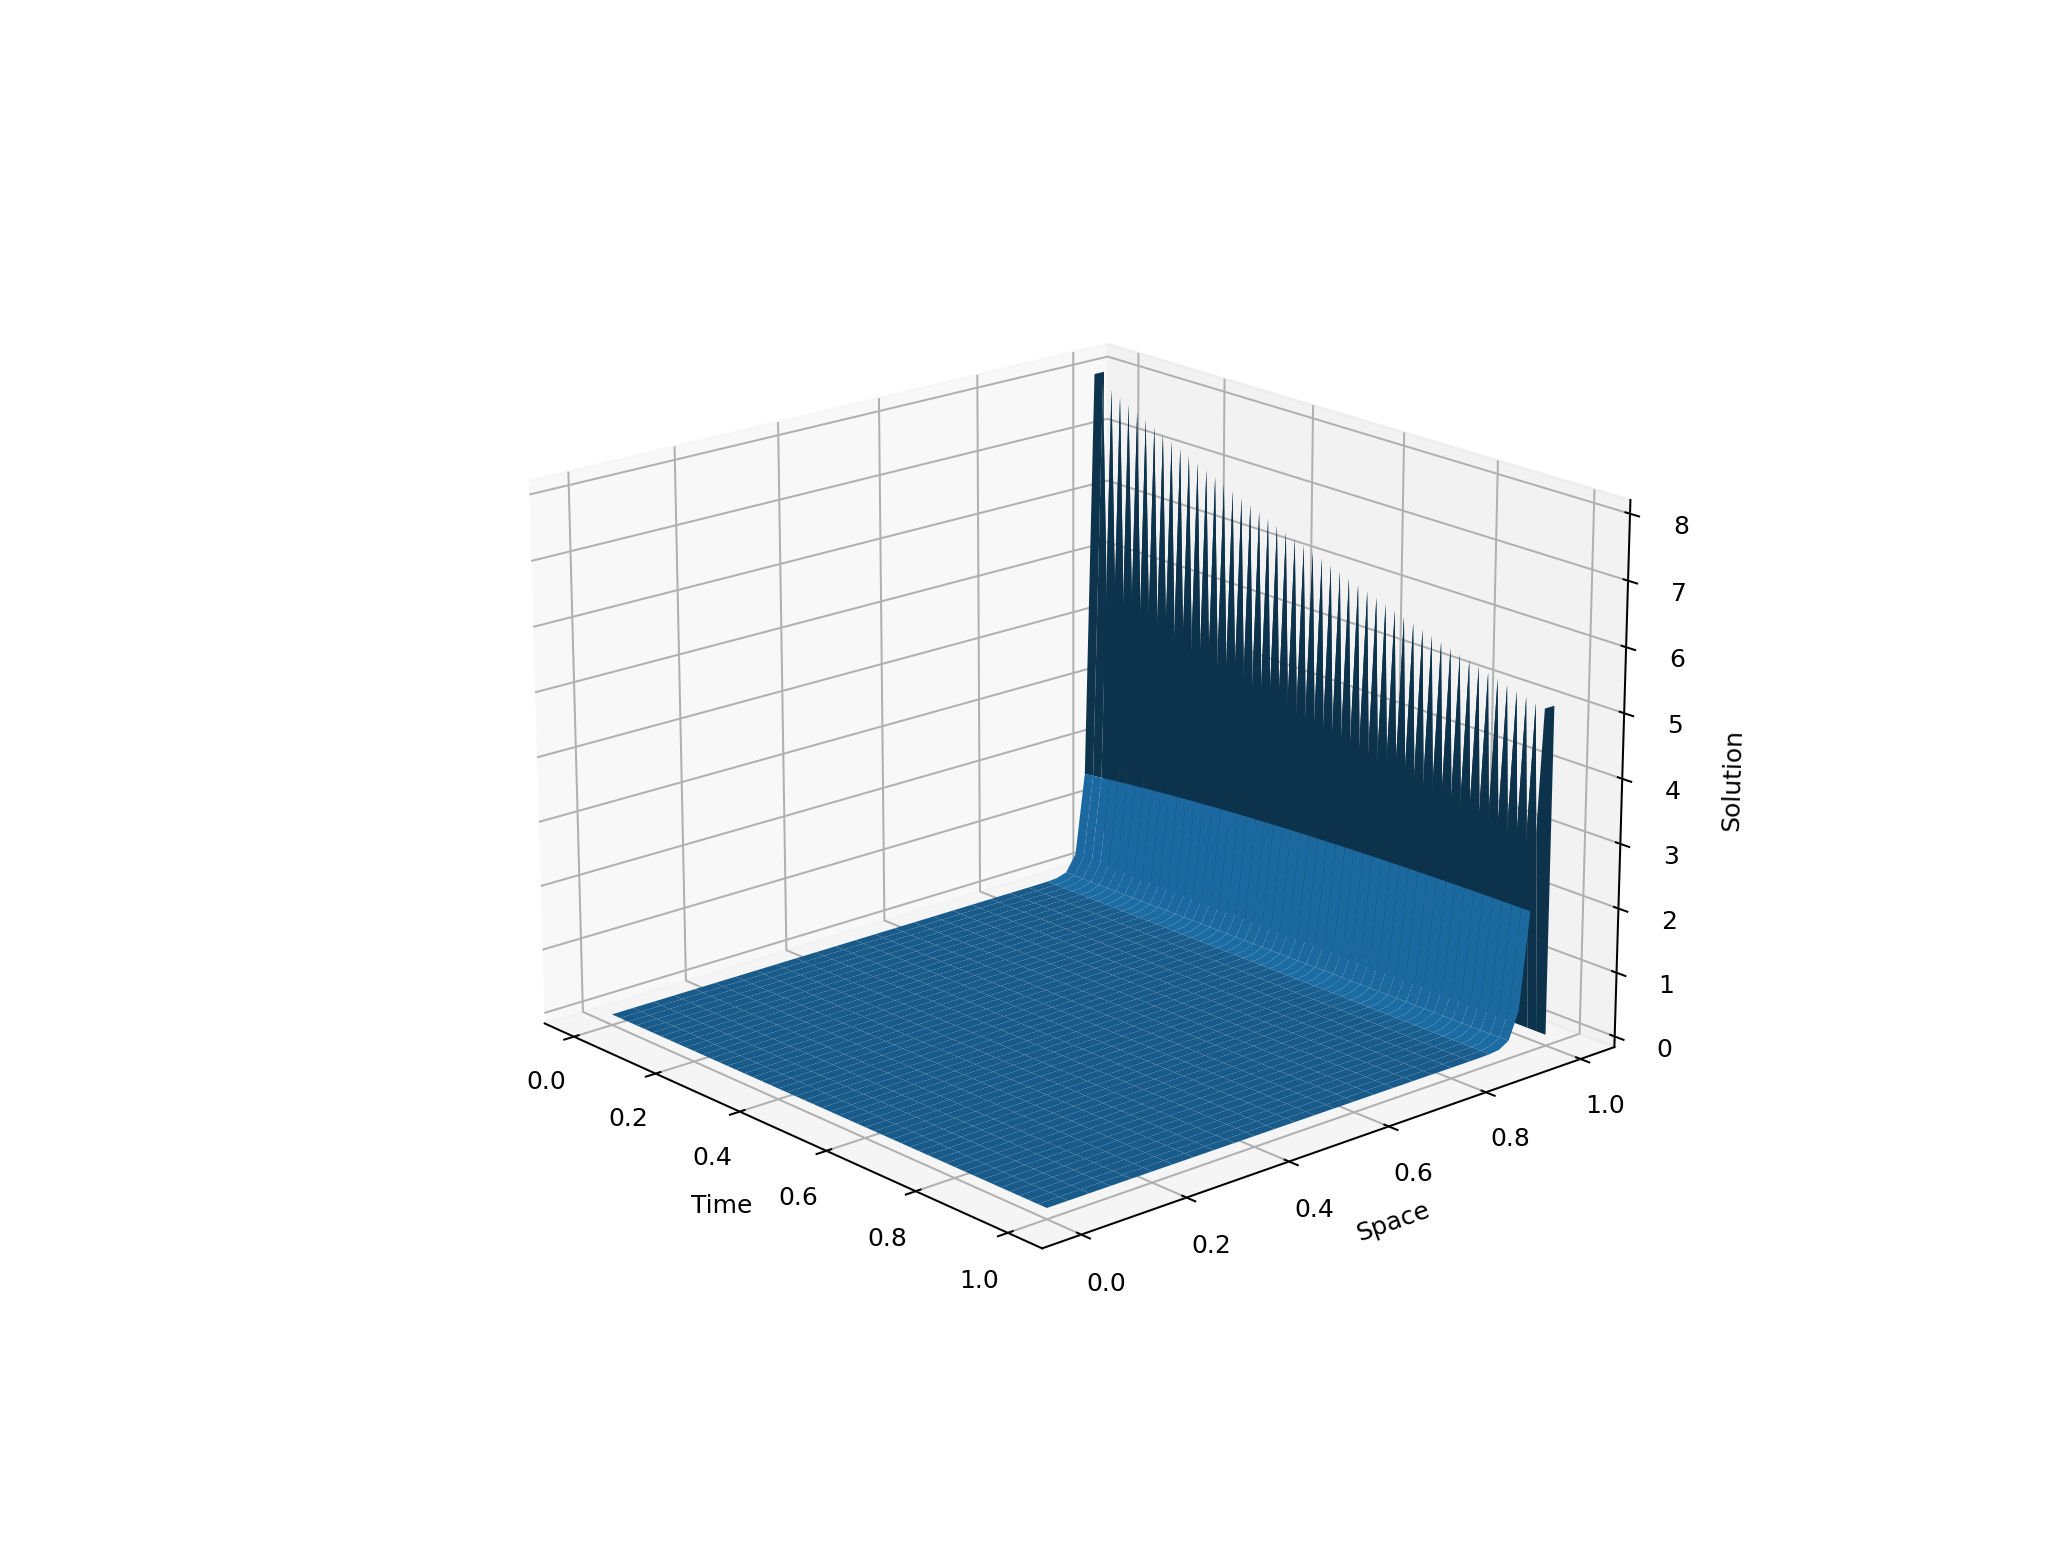

Text(0.5, 0, 'Solution')

In [87]:
##Codigo Marta
def rho_half (rho, v):
    # rho, v : column vectors of dim M
    rho_half = zeros([M,1])
    for i in range (M):
        if v[i] < 0:
            rho_half[i] = rho[i+1]
        else:
            rho_half[i] = rho[i]
    return rho_half

def Godunov(M, N, dx, dt, eps, U0, v, l):
    # v : MxN matrix
    r = (eps**2 * dt) / (2 * dx**2)
    a = ones(M+1)
    A = spdiags([a,-2*a,a], (-1,0,1), M+1, M+1)
    Id = eye(M+1)
    J = Id - r*A
    J[0,0] = 1
    J[0,1] = -1
    J[M,M-1] = 1
    J[M,M] = -1
    B = r*A + Id
    U = zeros([M+1, N])
    G = zeros(M+1)
    U[:,0] = U0
    if all(abs(v) <= l):
        for n in range(N-1):
            U_half = rho_half(U0,v[:,n])
            U0[0] = 0
            U0[-1] = 0
            if all(U_half) >= 0:
                for i in range(1,M):
                    G[i] = dt**2/dx * (U_half[i]*v[i,n] - U_half[i-1]*v[i-1,n])
            else:
                print('U_half < 0 for t =' +str(n))
                break
            U[:,n+1] = spsolve(J, B@U0 - G)
            U0 = U[:,n+1]
    else:
        print('v > lambda')
    return U


#v=rand(M+1,N,density=0.3)
#v= 4*np.random.rand(M+1,N)
v = 4.5*np.ones([M+1,N])

l = dx/(2*dt) - eps**2 /dx

sol=Godunov(M, N, dx, dt, eps, rho_ini,v,l)

 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

X,Y=meshgrid(t,x)

ax.plot_surface(X,Y,sol.reshape(X.shape))

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Solution')

3. It is clear that the schema can we written in the form:
    \begin{equation}
    \rho^{n+1} = \left( A + B(v^n) \right) \rho^n.
    \end{equation}
    
  
 
Since we have writte the system as:

$$(I-\alpha J)\rho^{n+1}=(I+\alpha J)\rho^{n}+B(v_n)\rho^n$$
and $(I-\alpha J)$ is invertible.

And $B$ comes from the discretization of the Godunov method:
$$
B=
\left(
\begin{array}{c}
0\\
alg \\
 \vdots\\
alg \\
0\\
\end{array}
\right)
$$

In [ ]:
from scipy.sparse.linalg import inv
A = lhs_implicit(M,N,alpha)
B = rhs_implicit(M,N,alpha)
Ma  = inv(A)@B
Ma

In [ ]:
Ma**2@rho_ini

In [ ]:
sol=Crank_Nicolson(M, N, dx, dt, eps, rho_ini)

In [ ]:
sol[:,3]

In [ ]:
sol[:,20]

In [ ]:
print(alpha)

In [ ]:
U[:,2]

In [ ]:
rho_ini

In [ ]:
print(Ma)

In [ ]:
A = lhs_simple(M,N,alpha)
B = rhs_simple(M,N,alpha)

In [ ]:
print(A)

In [ ]:
print(B)

In [ ]:
print(spdiags(a,(0,),M+1,M+1))

In [ ]:
A = lhs_simple(M,N,alpha)
inv(A)

In [ ]:
print(A)

In [78]:
ma = [mass(sol[:,i]) for i in range(N)]

In [79]:
ma

[-0.9999999999999979,
 -1.0000100200300412,
 -1.000020040160481,
 -1.0000300603913248,
 -1.00004008072257,
 -1.0000501011542209,
 -1.0000601216862766,
 -1.000070142318736,
 -1.0000801630516034,
 -1.0000901838848797,
 -1.000100204818564,
 -1.000110225852659,
 -1.0001202469871653,
 -1.0001302682220836,
 -1.0001402895574163,
 -1.0001503109931602,
 -1.0001603325293211,
 -1.0001703541658977,
 -1.0001803759028915,
 -1.0001903977403028,
 -1.0002004196781347,
 -1.0002104417163855,
 -1.0002204638550574,
 -1.000230486094151,
 -1.000240508433666,
 -1.0002505308736085,
 -1.000260553413976,
 -1.0002705760547683,
 -1.0002805987959889,
 -1.000290621637638,
 -1.0003006445797156,
 -1.0003106676222235,
 -1.000320690765163,
 -1.0003307140085345,
 -1.0003407373523383,
 -1.000350760796577,
 -1.0003607843412496,
 -1.0003708079863602,
 -1.0003808317319072,
 -1.0003908555778929,
 -1.0004008795243178,
 -1.0004109035711828,
 -1.000420927718489,
 -1.0004309519662384,
 -1.00044097631443,
 -1.0004510007630658,
 -1

In [72]:
M

50